In [104]:
%matplotlib inline
from math import pi, sqrt
from qiskit import *

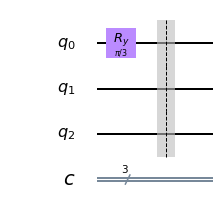

In [105]:
# Preparing qubit to be measured
# Here, we prepare q0 to be (sqrt(3)/2)|0> + (1/2)|1> using the Ry gate
prep_circuit = QuantumCircuit(3, 3)
prep_circuit.ry(pi/3, 0)
prep_circuit.barrier()
prep_circuit.draw(output="mpl")

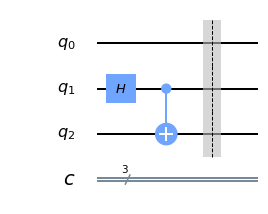

In [106]:
# Preparing the Bell state
bell_circuit = QuantumCircuit(3, 3)
bell_circuit.h(1)  # Superposition by Hadamard gate
bell_circuit.cx(1, 2)  # Entanglement by CNOT gate
bell_circuit.barrier()
bell_circuit.draw(output="mpl")

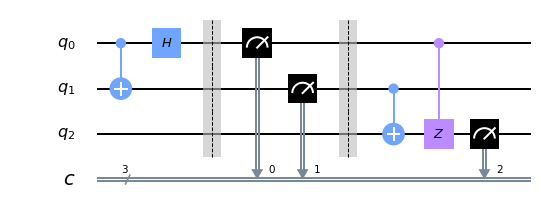

In [107]:
# Create circuit that uses Bell state to teleport
teleport_circuit = QuantumCircuit(3, 3)

# Step 0: Apply CNOT and Hadamard
teleport_circuit.cx(0, 1)
teleport_circuit.h(0)
teleport_circuit.barrier()

# Step 1: Measure first two qubits
# N.B.: We overwrite the reads because now we do not care much what measurement we got
# We could keep it to send, but our qubits are close enough just to use CNOT and CZ gates
teleport_circuit.measure([0, 1], [0, 1])
teleport_circuit.barrier()

# Step 2: Apply CNOT and CZ gates to recover original qubit
teleport_circuit.cx(1, 2)
teleport_circuit.cz(0, 2)

# In addition, we measure the qubit to check if it matches our expectations
teleport_circuit.measure(2, 2)

teleport_circuit.draw(output="mpl")

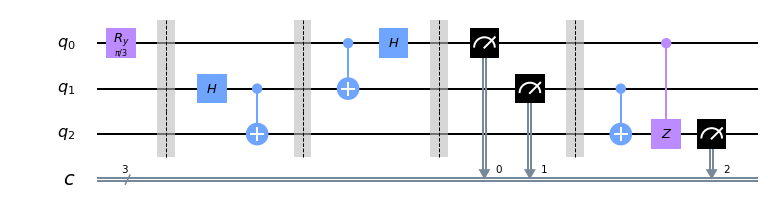

In [108]:
# Finally, we merge all the steps together
circuit = prep_circuit + bell_circuit + teleport_circuit
circuit.draw(output="mpl")

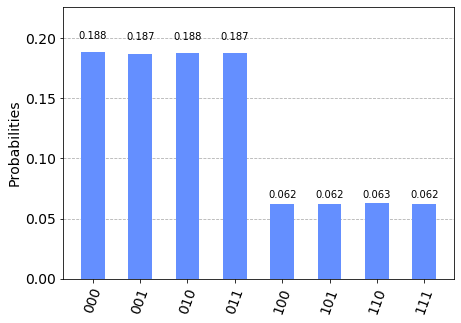

In [109]:
# We simulate to verify that the qubit was teleported
simulator = Aer.get_backend("qasm_simulator")
job = execute(circuit, simulator, shots=2**20)
result = job.result()
counts = result.get_counts()
visualization.plot_histogram(counts)

In [113]:
# Extracting alpha and beta from counts
alpha_sq = 0
beta_sq = 0

for key, value in counts.items():
    if key[0] == "0":
        alpha_sq += value
    else:
        beta_sq += value

alpha = sqrt(alpha_sq/(2**20))
beta = sqrt(beta_sq/(2**20))

print("{}|0> + {}|1>".format(alpha, beta))

0.8660567876508071|0> + 0.49994563760869526|1>


In [115]:
# The results match our expectations! Roughly (sqrt(3)/2)|0> + (1/2)|1>
# For purposes of reproducibility, the Qiskit version is
qiskit.__qiskit_version__

{'qiskit-terra': '0.11.0',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.4',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.14.0'}